# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
# CHANGED THIS CODE - copied from project 1
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[(num_test//2):], newsgroups_test.target[(num_test//2):]
dev_data, dev_labels = newsgroups_test.data[:(num_test//2)], newsgroups_test.target[:(num_test//2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples=5):

### STUDENT START ###

# for each example up to 'num_examples'
    for i in range(num_examples):
        
        # print the number of the example along with the label
        print ('\nTraining Example #', i + 1, 'is labeled as', (newsgroups_train.target_names[train_labels[i]]))        
        
        # print training example
        print (train_data[i])        

### STUDENT END ###

P1(5)


Training Example # 1 is labeled as comp.graphics
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Training Example # 2 is labeled as talk.religion.misc


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demons

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [18]:
def P2():
### STUDENT START ###
# (a)
    # size of the vocabulary?
    # first define the CountVectorizer
    CountV = CountVectorizer()
    feature_vectors = CountV.fit_transform(raw_documents = train_data)
    print ('(a) The size of the vocabulary is ', (feature_vectors.shape[1]))

 # average number of non-zero features per example? (or the avg number of words per example)
    print ('The average number of non-zero features per example is', 
           (feature_vectors.nnz / float(len(train_data))))

    # what fraction of the entries in the matrix are non-zero?
    print (float(feature_vectors.nnz), '/', (float(feature_vectors.shape[0]) * (float(feature_vectors.shape[1])))
           , 'is the fraction of the entries in the matrix that non-zero')
        
# (b)
    # 0th and last feature strings (in alphabetical order)?
    feature_strings = CountV.get_feature_names()
    feature_strings.sort()
    print ('\n(b) The 0th feature string is', (feature_strings[0]))
    print ('The last feature string is', (feature_strings[-1]))
        
        
# (c)
    # Specify a vocabulary with 4 words: ["atheism", "graphics", "space", "religion"].
    # Confirm the training vectors are appropriately shaped.
    # What's the average number of non-zero features per example?
    specificvocab = ["atheism", "graphics", "space", "religion"]
    CountV_specificvocab = CountVectorizer(vocabulary = specificvocab)
    feature_vectors_specificvocab = CountV_specificvocab.fit_transform(raw_documents = train_data)
    print ('\n(c) Dimensions of training vectors with 4-word vocabulary:', feature_vectors_specificvocab.shape)
    print ('The average number of non-zero features per example when using a specific 4-word vocabulary is', 
            (feature_vectors_specificvocab.nnz / float(len(train_data))), ',\nmeaning any of the defined vocabulary'
            ' words appear in about 1/4 of the examples.')
    
# (d)
    # Use "analyzer" and "ngram_range" to extract bigram and trigram character features.
    # What size vocabulary does this yield?
    CountV_ngram = CountVectorizer(analyzer = 'char', ngram_range = (2,3))
    feature_vectors_ngram = CountV_ngram.fit_transform(raw_documents = train_data)
    print ('\n(d) The size of the vocabulary when extracting bigram and trigram character '
          'features is', (feature_vectors_ngram.shape[1]))
    
# (e)
    # Use the "min_df" argument to prune words that appear in fewer than 10 documents.
    # What size vocabulary does this yield?
    CountV_prune = CountVectorizer(min_df = 10)
    feature_vectors_prune = CountV_prune.fit_transform(raw_documents = train_data)
    print ('\n(e) The size of the vocabulary when pruning words that appear in fewer than 10 ' \
          'documents is', (feature_vectors_prune.shape[1]))

# (f)
    # What fraction of the words in the dev data are missing from the vocabulary?
    # words in dev set that are not in training set = words in both sets - words in training set
    words_in_both = float(len(CountV.fit(raw_documents = train_data+dev_data).get_feature_names()))
    words_in_train = float(len(CountV.fit(raw_documents = train_data).get_feature_names())) 
    words_in_dev = float(len(CountV.fit(raw_documents = dev_data).get_feature_names()))
    print ('\n(f)', (words_in_both - words_in_train), '/', (words_in_dev), 'is the fraction of the'
           ' words in the dev data that are missing from the vocabulary.')

    
### STUDENT END ###
P2()

(a) The size of the vocabulary is  26879
The average number of non-zero features per example is 96.70599803343165
196700.0 / 54671886.0 is the fraction of the entries in the matrix that non-zero

(b) The 0th feature string is 00
The last feature string is zyxel

(c) Dimensions of training vectors with 4-word vocabulary: (2034, 4)
The average number of non-zero features per example when using a specific 4-word vocabulary is 0.26843657817109146 ,
meaning any of the defined vocabulary words appear in about 1/4 of the examples.

(d) The size of the vocabulary when extracting bigram and trigram character features is 35478

(e) The size of the vocabulary when pruning words that appear in fewer than 10 documents is 3064

(f) 4027.0 / 16246.0 is the fraction of the words in the dev data that are missing from the vocabulary.


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

k Nearest Neighbors:
The optimal value for k is 13.00
F1 score for a k-Nearest Neighbors classifier using the optimal value for k: 0.41

Multinomial Naive Bayes
The optimal value for alpha is 0.06
F1 score for a Multinomial NB classifier using the optimal value for alpha: 0.77

Logistic Regression


/Users/alexwest/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexwest/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The optimal value for C is 0.12
F1 score for a Logistic Regression classifier using the optimal value for C: 0.69

The sum of the squared weight values for each class for each setting of the C parameter:


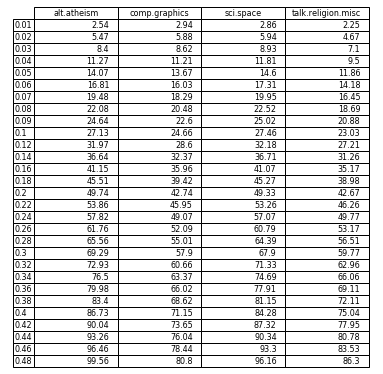

In [5]:
def P3():
### STUDENT START ###
    # vectorize the data using CountVectorizer, used in all 3 classifiers
    # use fit.transform on training data, and just transform on dev data
    CountV = CountVectorizer()
    feature_vectors_train = CountV.fit_transform(raw_documents = train_data)
    feature_vectors_dev = CountV.transform(raw_documents = dev_data)
    
    # for each of the three we will use GridSearchCV to find optimal parameters 
    
    # k Nearest Neighbors 
    print ('k Nearest Neighbors:')
    # first, find optimal value for k: Use GridSearchCV on k values up to 100 - using the rule of 
    # thumb that optimal k is the square root of the size of the training set 
    # Note: I tried this several times and got the best k at 96, but ONLY if I made the range 
    # just like this (it won't work if you do 1, 100, 1).
    param_k = {'n_neighbors': np.concatenate([np.arange(1,50,1),np.arange(50,100,2)]).tolist()}
    knn_best_param = GridSearchCV(KNeighborsClassifier(), param_k, scoring = 'f1_macro', cv = 2)
    knn_best_param.fit(feature_vectors_train, train_labels)
    k_optimal = knn_best_param.best_params_['n_neighbors']
    print ('The optimal value for k is {0:.2f}'.format(k_optimal))
    
    # set model and parameters, fit model, score model
    knn_model = KNeighborsClassifier(n_neighbors = k_optimal)
    knn_model.fit(feature_vectors_train, train_labels)
    dev_predicted_labels = knn_model.predict(feature_vectors_dev)
    print ('F1 score for a k-Nearest Neighbors classifier using the '\
           'optimal value for k: {0:.2f}'.format(metrics.f1_score(y_true = dev_labels, 
                                                                  y_pred = dev_predicted_labels, 
                                                                  average = 'macro')))

    # Multinomial Naive Bayes
    print ('\nMultinomial Naive Bayes')
    # first, find optimal value for alpha using GridSearch CV, trying between 0 and 1
    alpha = np.concatenate([np.arange(1.0e-10,0.01,0.002),np.arange(0.01,0.1,0.01),
                            np.arange(0.1,1.1,0.1)])
    param_alpha = {'alpha': list(alpha)}
    mnb_best_param = GridSearchCV(MultinomialNB(), param_alpha, scoring = 'f1_macro', cv = 2)
    mnb_best_param.fit(feature_vectors_train, train_labels)
    alpha_optimal = mnb_best_param.best_params_['alpha']
    print ('The optimal value for alpha is {0:.2f}'.format(alpha_optimal))
    
    # set model and parameters, fit model, score model
    mnb_model = MultinomialNB(alpha = alpha_optimal)
    mnb_model.fit(feature_vectors_train, train_labels)
    dev_predicted_labels = mnb_model.predict(feature_vectors_dev)
    print ('F1 score for a Multinomial NB classifier using the optimal '
           'value for alpha: {0:.2f}'.format(metrics.f1_score(y_true = dev_labels, 
                                                              y_pred = dev_predicted_labels, 
                                                              average = 'macro')))

    # Logistic Regression
    print ('\nLogistic Regression')
    # C is the "inverse of regularization strength. smaller values specify stronger regularization."
    # I tried values of C up to 8, but after finding optimal value, changed code to be faster
    c_possibilities = np.concatenate([np.arange(0.01,0.1,0.01),np.arange(0.1,0.5,0.02)])
                                    #, np.arange(0.5,2,0.1),np.arange(2,8,1)])
    # find optimal value of C using GridSearch 
    param_c = {'C': list(c_possibilities)}
    Log_best_param = GridSearchCV(LogisticRegression(penalty = 'l2'), param_c, 
                                  scoring = 'f1_macro', cv = 2)
    Log_best_param.fit(feature_vectors_train, train_labels)
    c_optimal = Log_best_param.best_params_['C']
    print ('The optimal value for C is {0:.2f}'.format(c_optimal))
    
    # set model parameters, fit model, score model
    LR_model = LogisticRegression(penalty = 'l2', C = c_optimal)
    LR_model.fit(feature_vectors_train, train_labels)
    dev_predicted_labels = LR_model.predict(feature_vectors_dev)
    print ('F1 score for a Logistic Regression classifier using the optimal value for C: {0:.2f}'\
          .format(metrics.f1_score(y_true = dev_labels, y_pred = dev_predicted_labels, average='macro')))

    # Output the sum of the squared weight values for each class for each setting of the C parameter.
    # create an array for the squared sum values using the shape of c_possibilities
    squared_sum = np.zeros(4 * c_possibilities.shape[0]).reshape(c_possibilities.shape[0],4)
    
    for i,c in enumerate(c_possibilities):
        LR_model = LogisticRegression(penalty = 'l2', C = c)
        LR_model.fit(feature_vectors_train, train_labels)
        squared_sum[i,:] = np.square(LR_model.coef_).sum(axis = 1)

    print ('\nThe sum of the squared weight values for each class for each setting of the C parameter:')
    
    # plot table    
    plt.axis('off')
    table = plt.table(cellText = np.around(squared_sum, decimals = 2),
                        rowLabels = np.around(c_possibilities, decimals = 3),
                        colLabels = newsgroups_train.target_names, loc = 'center')
    plt.show()
    
### STUDENT END ###
P3()

**ANSWER**:

_a. Why doesn't nearest neighbors work well for this problem?_

The nearest neighbors model is based on features that are similar or near to one another. In topic classification, the feature space is nearly infinite. This shows a weakness in the Nearest Neighbors model: the "curse of dimensionality." Data in many dimensions is difficult for this model - especially since we did not assign weights to our topics; each feature is assigned the same weight. Assigning a weight would give more weight to the topic words, and less to the common words that are shared between examples from every topic.

_b. Any ideas why logistic regression doesn't work as well as Naive Bayes?_

Broadly speaking, this relates to the difference between a generative model (Naive Bayes) and a discriminative model (Logistic Regression). Logistic Regression will perform better than a generative model when the size of the training data is large. However, the generative model reaches its peak performance with fewer training sets. Therefore, the Naive Bayes model will perform better when the model is so complex and there isn't enough training data.

_c. Logistic regression estimates a weight vector for each class, which you can access with the coef\ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C._

As C increases, so too does the sum of the squared weights. This makes sense, as C is a measure of regularization. As C approaches 0, so too do the coefficients of any class, giving a 50% likelihood of any of them. The relevance of each of the features increases as we increase the value of C (penalizing less and less).


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

Table with single gram features


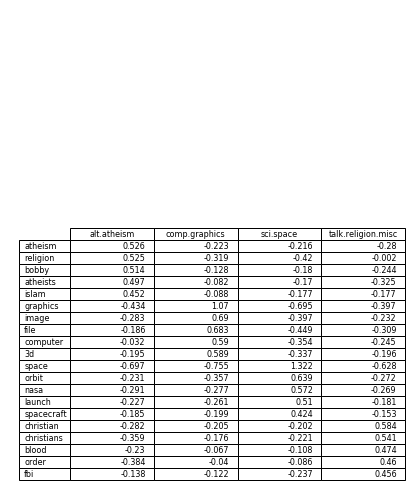

Table with bigram features


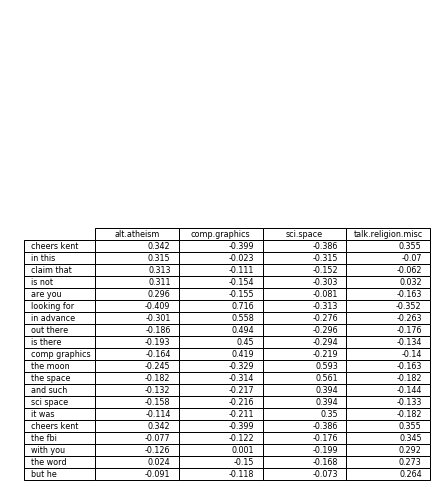

In [6]:
def P4():
### STUDENT START ###
    def make_table(CountV):
        
        # define feature vectors using Count Vectorizer (depends on ngram)
        feature_vectors_train = CountV.fit_transform(raw_documents = train_data)
    
        # Create Logistic Regression model and fit the model
        # Use optimal value of C found in previous problem
        LR_model = LogisticRegression(penalty ='l2', C = 0.12)
        LR_model.fit(feature_vectors_train, train_labels)
    
        # We now have the weights for each label, let's find the 5 largest for each label
        five = np.argpartition(LR_model.coef_, -5)[:,-5:]
    
        # We have the positions of the 5 features with the largest weights, but unordered
        # order from largest to smallest    
        for i in range(len(newsgroups_train.target_names)):
            five[i,:] = five[i, np.argsort(np.take(LR_model.coef_[i,:], five[i,:]))[::-1]]
        
        # prepare them to get the weights in those positions
        five = five.flatten()
        weights = np.take(LR_model.coef_, five, axis = 1).T
        words = CountV.get_feature_names()

        # create an empty array of strings for the features
        main_features = np.empty(20).astype('str')
        # Print the feature name for each of the heaviest weights
        print
        for i in range(five.shape[0]):
            main_features[i] = words[five[i]]
        # Plot the table using matplotlib
        plt.axis('off')
        table = plt.table(cellText = np.around(weights, decimals = 3),rowLabels = main_features, 
                           colLabels = newsgroups_train.target_names)
        plt.show()

    print ("Table with single gram features")
    make_table(CountVectorizer())
    print ("Table with bigram features")
    make_table(CountVectorizer(analyzer='word', ngram_range=(2,2)))
    
### STUDENT END ###
P4()

**ANSWER:**

The tables look very different. 

The single word model can find words that are most frequent in one topic over others. The weight values for those top 5 words have a positive value for the classes they are associated with, and a large absolute value (but negative actual value) for other classes they are not associated with. 

With the bigram model, the two-word combinations that typically show up ("it was", "and such", "is not") appear in every topic. The weight values are not as large either positive or negative. Words that were associated with a particular topic in the single word model don't often appear together ("nasa orbit", for example).

Therefore, the 'bag of words' model might need a higher number of ngrams to find those phrases that are truly unique to a topic; or the single word model is best. This would require further testing.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [7]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):

### STUDENT START ###

    # change to lowercase 
    s = s.lower()
    # shorten long words to <= 6 characters
    s = re.sub("(\w{%d})\w+" % 6, "\\1", s)
    # discard non-letter or non-number characters
    s = re.sub("[^A-Za-z0-9 \\n]", " ", s)
    # replace sequences of numbers with "number" 
    s = re.sub("([\d]+)", " number ", s)
    
    return s

def P5():

    # empty preprocessor score
    CountV1 = CountVectorizer(preprocessor = empty_preprocessor)
    feature_vectors_train1 = CountV1.fit_transform(raw_documents = train_data)
    feature_vectors_dev1 = CountV1.transform(raw_documents = dev_data)

    # train, fit, and predict a Logistic Regression model with empty preprocessor
    LR_model1 = LogisticRegression(penalty = 'l2')
    LR_model1.fit(feature_vectors_train1, train_labels)
    dev_predicted_labels1 = LR_model1.predict(feature_vectors_dev1)
    
    # calculate the score
    f1_LR_empty = metrics.f1_score(y_true = dev_labels, y_pred = 
                                   dev_predicted_labels1, average = 'macro')
    
    # print empty preprocessor results
    print ('F1 score for a Logistic Regression classifier '
            'using empty preprocessor: {0:.2f}'.format(f1_LR_empty))

    # better preprocessor score - using stop_words increases F1 score the most
    # stop_words is more effective than better preprocessor on its own
    CountV2 = CountVectorizer(preprocessor = better_preprocessor, stop_words = 'english')
    feature_vectors_train2 = CountV2.fit_transform(raw_documents = train_data)
    feature_vectors_dev2 = CountV2.transform(raw_documents = dev_data)
    
    # train, fit, and predict a Logistic Regression model using the preprocessor
    LR_model2 = LogisticRegression(penalty = 'l2')
    LR_model2.fit(feature_vectors_train2, train_labels)
    dev_predicted_labels2 = LR_model2.predict(feature_vectors_dev2)
    
    # calculate the score
    f1_LR_pre = metrics.f1_score(y_true = dev_labels, 
                                 y_pred = dev_predicted_labels2, average = 'macro')
    
    # print all the results
    print ('F1 score for a Logistic Regression classifier using '
           'better preprocessor and stop words: {0:.2f}'.format(f1_LR_pre))
    
    print ('F1 score is {0:.2f} points higher with '\
           'better_preprocessor and stop words'.format(100 * (f1_LR_pre - f1_LR_empty)))
    
    print ('The size of the vocabulary with empty_preprocessor is',
           (feature_vectors_train1.shape[1]))
    
    print ('The size of the vocabulary with better_preprocessor is',
           (feature_vectors_train2.shape[1]))
    
    print ('better_preprocessor reduced the size of the vocabulary,' 
           ' it is {0:.2f}% the size'.format(100*(float((feature_vectors_train2.shape[1])/
                      (feature_vectors_train1.shape[1])))))
    
    
P5()

F1 score for a Logistic Regression classifier using empty preprocessor: 0.69


/Users/alexwest/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterw', 'agains', 'alread', 'althou', 'amongs', 'amoung', 'anothe', 'anythi', 'anywhe', 'becaus', 'becomi', 'betwee', 'couldn', 'descri', 'elsewh', 'everyo', 'everyt', 'everyw', 'fiftee', 'furthe', 'hereaf', 'hereup', 'hersel', 'himsel', 'howeve', 'hundre', 'intere', 'meanwh', 'moreov', 'neithe', 'nevert', 'nothin', 'nowher', 'otherw', 'oursel', 'perhap', 'seemin', 'seriou', 'severa', 'sincer', 'someho', 'someon', 'someth', 'someti', 'somewh', 'themse', 'therea', 'thereb', 'theref', 'therei', 'thereu', 'throug', 'togeth', 'whatev', 'whenev', 'wherea', 'whereb', 'wherei', 'whereu', 'wherev', 'whethe', 'whithe', 'whoeve', 'withou', 'yourse'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


F1 score for a Logistic Regression classifier using better preprocessor and stop words: 0.72
F1 score is 3.23 points higher with better_preprocessor and stop words
The size of the vocabulary with empty_preprocessor is 33291
The size of the vocabulary with better_preprocessor is 17277
better_preprocessor reduced the size of the vocabulary, it is 51.90% the size


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]


For C =  0.001 :
- Number of learned weights not equal to zero using a L1 penalty:  5 , 0.0 % of the size using L2
- These weights correspond to a total of 2 features (vocabulary size) 0.01 % of the size using L2
- Accuracy using a L2 penalty without trimming: 0.63
- Accuracy using a L2 penalty after trimming: 0.34
( 46.0 % lower)

For C =  0.01 :
- Number of learned weights not equal to zero using a L1 penalty:  36 , 0.03 % of the size using L2
- These weights correspond to a total of 17 features (vocabulary size) 0.06 % of the size using L2
- Accuracy using a L2 penalty without trimming: 0.68
- Accuracy using a L2 penalty after trimming: 0.49
( 29.0 % lower)

For C =  0.1 :
- Number of learned weights not equal to zero using a L1 penalty:  357 , 0.33 % of the size using L2
- These weights correspond to a total of 206 features (vocabulary size) 0.77 % of the size using L2
- Accuracy using a L2 penalty without trimming: 0.70
- Accuracy using a L2 penalty after trimming: 0.68
( 3.0 % l

/Users/alexwest/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



For C =  10.0 :
- Number of learned weights not equal to zero using a L1 penalty:  4964 , 4.62 % of the size using L2
- These weights correspond to a total of 2614 features (vocabulary size) 9.73 % of the size using L2
- Accuracy using a L2 penalty without trimming: 0.68
- Accuracy using a L2 penalty after trimming: 0.70
( -2.0 % lower)

For C =  100.0 :
- Number of learned weights not equal to zero using a L1 penalty:  17738 , 16.5 % of the size using L2
- These weights correspond to a total of 7557 features (vocabulary size) 28.11 % of the size using L2
- Accuracy using a L2 penalty without trimming: 0.70
- Accuracy using a L2 penalty after trimming: 0.70
( 0.0 % lower)


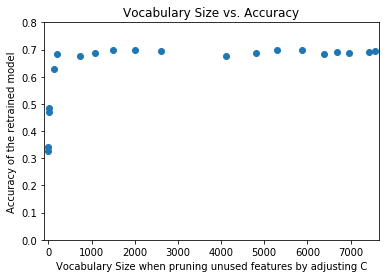

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    # We'll plot results for several values of C
    c = np.concatenate([np.array([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 
                                  1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])])
    
    # create empty arrays for accuracy, vocab_size, and non_zero_weights
    accuracy = np.zeros(len(c))
    vocab_size = np.zeros(len(c)).astype('u4')
    non_zero_weights = np.zeros(len(c)).astype('u4')
    
    for i in range(len(c)):
        CountV = CountVectorizer()
        feature_vectors_train = CountV.fit_transform(raw_documents = train_data)
        feature_vectors_dev = CountV.transform(raw_documents = dev_data)
        
        # Train a logistic regression model using a "l1" penalty
        # for each value of C defined above, remember the tolerance
        LR_model_l1 = LogisticRegression(penalty = 'l1', C = c[i], tol = .01)
        LR_model_l1.fit(feature_vectors_train, train_labels)

        # add the vocabulary size and non zero weights for each value of C
        # to the empty arrays created above
        vocab_size[i] = np.count_nonzero(np.apply_along_axis(np.count_nonzero, 0, LR_model_l1.coef_))
        non_zero_weights[i] = np.apply_along_axis(np.count_nonzero, 0, LR_model_l1.coef_).sum()
    
        # Reduce the size of the vocabulary by keeping only those features that
        # have at least one non-zero weight and retrain a model using "l2".
        # filter those weights/coefficients that are not equal to zero.
        mask = (LR_model_l1.coef_ != 0)
        
        # Any column/feature with at least one non-zero weight must be kept
        keepx = mask.any(axis = 0)
        
        # Trim both train and dev sets 
        feature_vectors_train_trim = feature_vectors_train[:, keepx]
        feature_vectors_dev_trim = feature_vectors_dev[:, keepx]

        # Train a new model using "l2" and the trimmed data
        LR_model_l2 = LogisticRegression(penalty = 'l2', C = c[i], tol = .01)
        
        # And fit it only with the features given by "l1"
        LR_model_l2.fit(feature_vectors_train_trim, train_labels)
        dev_predicted_labels_trim = LR_model_l2.predict(feature_vectors_dev_trim)
        
        # add to the accuracy array
        accuracy[i] = metrics.accuracy_score(y_true = dev_labels,
                                             y_pred = dev_predicted_labels_trim)

        # Print results for some chosen values of C (not all)
        if c[i] in [0.001, 0.01, 0.1, 1, 10, 100]:
            LR_model_l2.fit(feature_vectors_train, train_labels)
            l2_nonzero_weights = np.apply_along_axis(np.count_nonzero, 0, LR_model_l2.coef_).sum()
            l2_vocab_size = np.count_nonzero(np.apply_along_axis(np.count_nonzero, 0, LR_model_l2.coef_))
            
            print ('\nFor C = ', c[i], ':')
            print ('- Number of learned weights not equal to zero using a L1 penalty: ', 
                   non_zero_weights[i], ',', round(100 * non_zero_weights[i]/l2_nonzero_weights, 2),
                   '% of the size using L2')
            print ('- These weights correspond to a total of', vocab_size[i], 'features (vocabulary size)', 
                   round(100 * vocab_size[i]/l2_vocab_size, 2), '% of the size using L2')
            
            dev_predicted_labels_untrim = LR_model_l2.predict(feature_vectors_dev)
            accuracy_untrim = metrics.accuracy_score(y_true = dev_labels,
                                                       y_pred = dev_predicted_labels_untrim)
            
            print ('- Accuracy using a L2 penalty without trimming: {0:.2f}'.format(accuracy_untrim))
            print ('- Accuracy using a L2 penalty after trimming: {0:.2f}'.format(accuracy[i]))
            print ('(', round(100 * (1 - accuracy[i]/accuracy_untrim)), '% lower)')
                
    # Make a plot showing accuracy of the re-trained model vs. the vocabulary size you 
    # get when pruning unused features by adjusting the C parameter.
    plt.scatter(vocab_size, accuracy)
    plt.xlabel("Vocabulary Size when pruning unused features by adjusting C")
    plt.ylabel("Accuracy of the retrained model")
    plt.title('Vocabulary Size vs. Accuracy')
    plt.xlim([-100, vocab_size.max() + 100])
    plt.ylim([0, 0.8])
       

    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [9]:
def P7():
    ### STUDENT START ###
    
    # set up Tfidf vectorizer, vectorize both training and dev data
    TF = TfidfVectorizer()
    feature_vectors_train = TF.fit_transform(raw_documents = train_data)
    feature_vectors_dev = TF.transform(raw_documents = dev_data)
    
    # train a Logistic Regression model with C = 100
    LR_model = LogisticRegression(penalty = 'l2', C = 100)
    # fit the model
    LR_model.fit(feature_vectors_train, train_labels)
    # predict 
    dev_predicted_labels = LR_model.predict(feature_vectors_dev)
    
    print ('Accuracy for a Logistic Regression classifier using TfidfVectorizer:', 
           metrics.accuracy_score(y_true = dev_labels, y_pred = dev_predicted_labels))
    
    # define R by first finding maximum predicted probability and
    # predicted probability of the correct label
    
    # find maximum predicted probability
    dev_p = LR_model.predict_proba(feature_vectors_dev)
    max_p = dev_p.max(axis = 1)
    
    # make an array of predicted probability of the correct label
    p_correct_label = np.array([dev_p[i,j] for i,j in zip(range(len(dev_labels)),dev_labels)])
    
    # R is maximum predicted probability divided by 
    # predicted probability of the correct label
    R = max_p / p_correct_label

    # Find the top 3 documents where the R ratio is the highest
    doc_ind = np.argpartition(R, -3)[-3:]
    # in descending order
    doc_ind = doc_ind[np.argsort(R[doc_ind])][::-1]
    
    # Print top 3 results - where the probability of the correct category is 
    # furthest from predicted probability
    for i, ind in enumerate(doc_ind):
        print ('\nDocument #', ind + 1, '\nR = {0:.3f}'.format(R[ind]))
        print ('- Predicted Category =',  newsgroups_train.target_names[dev_p[ind,:].argmax()],
               '(prob = {0:.3f})'.format(max_p[ind]))
        print ('- Correct Category =', newsgroups_train.target_names[dev_labels[ind]], 
               '(prob = {0:.3f})'.format(dev_p[ind,dev_labels[ind]]))
        print ('\n', dev_data[ind])
        print ('\n------------')
        
### STUDENT END ###
P7()

Accuracy for a Logistic Regression classifier using TfidfVectorizer: 0.7633136094674556

Document # 216 
R = 929.358
- Predicted Category = comp.graphics (prob = 0.994)
- Correct Category = talk.religion.misc (prob = 0.001)

 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (

**ANSWER:**
TfidfVectorizer is different from CountVectorizer in that it emphasizes only the most common RARE words - not all most common words. It will give less weight to words that are common in all examples, and more weight to words that only appear in the training examples of certain categories.

The model is making errors in classification between atheism and religion, and computer graphics and lots of other categories. Atheism and religion will understandably be confusing and share a lot of the same words. It would be very difficult to train a model to tell the difference between these two subjects. However, with comp.graphics, it may be possible to exclude some words from the model that are frequently found with those documents but not exclusively: "internet", "online", "ftp", etc. This may make the Tfidf model more accurate.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance